# Chapter 2

## Modules used

In [1]:
from math import sqrt, ceil
from typing import List
from collections.abc import Sequence
import random
import re
import time

## Reinforcement

### R-2.1

Give three examples of life-critical software applications.

    * Intensive Care Unit systems
    * Traffic light management system
    * Air traffic control system

### R-2.2

Give an example of a software application in which adaptability can mean
the difference between a prolonged lifetime of sales and bankruptcy.

    Enterprise Resource Planning system

### R-2.3

Describe a component from a text-editor GUI and the methods that it encapsulates.

    WordWrap module:
        * get_window_width
        * break_line
        * process_text

### R-2.4

Write a Python class, Flower, that has three instance variables of type str,
int, and float, that respectively represent the name of the flower, its number of petals, and its price. Your class must include a constructor method
that initializes each variable to an appropriate value, and your class should
include methods for setting the value of each type, and retrieving the value
of each type.

In [1]:
class Flower:
    """Class representing flowers"""
    
    def __init__(self, name: str, petals: int, price: float):
        self._name = name
        self._petals = petals
        self._price = price
    
    def get_name(self):
        return self._name
    
    def set_name(self, name: str):
        self._name = name
    
    def get_petals(self):
        return self._petals
    
    def set_petals(self, petals: int):
        self._petals = petals
        
    def get_price(self):
        return self._price
    
    def set_price(self, price: float):
        self._price = price

### R-2.5, 2.6, 2.7

In [37]:
class CreditCard:
    """Credit card class implementation"""
    
    def __init__ (self, customer, bank, acnt, limit, balance = 0):
        """Create a new credit card instance.

        The initial balance is zero.

        customer the name of the customer (e.g., John Bowman )
        bank the name of the bank (e.g., California Savings )
        acnt the acount identifier (e.g., 5391 0375 9387 5309 )
        limit credit limit (measured in dollars)
        """
        self._customer = customer
        self._bank = bank
        self._account = acnt
        self._limit = limit
        self._balance = balance
        
    def get_customer(self):
        """Return name of the customer."""
        return self._customer

    def get_bank(self):
        """Return the bank s name."""
        return self._bank
    
    def get_account(self):
        """Return the card identifying number (typically stored as a string)."""
        return self._account
    
    def get_limit(self):
        """Return current credit limit."""
        return self._limit

    def get_balance(self):
        """Return current balance."""
        return self._balance
    
    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed; False if charge was denied.
        """
        if not isinstance(price, (int, float)):
            raise TypeError('price needs to be a number!')
        
        if price + self._balance > self._limit: # if charge would exceed limit,
            return False # cannot accept charge
        else:
            self._balance += price
        return True

    def make_payment(self, amount):
        """Process customer payment that reduces balance"""
        
        if not isinstance(amount, (int, float)):
            raise TypeError('amount needs to be a number!')
        elif amount < 0:
            raise ValueError('amount cannot be negative!')
            
        self._balance -= amount
        

my_card = CreditCard('John Doe', 'CITI', '1205', 50000)
my_card2 = CreditCard('Johnny', 'Metro', 'XYZ', 20000, 100)

### R-2.5

Use the techniques of Section 1.7 to revise the charge and make payment
methods of the CreditCard class to ensure that the caller sends a number
as a parameter.

In [38]:
print(my_card.charge('twenty'))
print(my_card.make_payment('twenty'))

TypeError: price needs to be a number!

### R-2.6

If the parameter to the make payment method of the CreditCard class
were a negative number, that would have the effect of raising the balance
on the account. Revise the implementation so that it raises a ValueError if
a negative value is sent.

In [39]:
print(my_card.make_payment(-1))

ValueError: amount cannot be negative!

### R-2.7

The CreditCard class of Section 2.3 initializes the balance of a new account to zero. Modify that class so that a new account can be given a
nonzero balance using an optional fifth parameter to the constructor. The
four-parameter constructor syntax should continue to produce an account
with zero balance.

In [40]:
print(my_card.get_balance())
print(my_card2.get_balance())

0
100


### R-2.8

Modify the declaration of the first for loop in the CreditCard tests, from
Code Fragment 2.3, so that it will eventually cause exactly one of the three
credit cards to go over its credit limit. Which credit card is it?

In [12]:
wallet = []
wallet.append(CreditCard('John Bowman','California Savings','5391 0375 9387 5309', 2500) )
wallet.append(CreditCard('John Bowman','California Federal','3485 0399 3395 1954', 3500) )
wallet.append(CreditCard('John Bowman','California Finance','5391 0375 9387 5309', 5000) )

"""
Sum of AP for first n numbers = n/2 * (a1 + (n - 1) * d)
d = a2 - a1

Third one's limit is 5000, so we need to determine n:

5000 = n/2 * (3 + (n - 1) * 3)
n = 57.73
"""

for val in range(1, 58):
    wallet[0].charge(val)
    wallet[1].charge(2*val)
    wallet[2].charge(3*val)
    
for c in range(3):
    print('Customer =', wallet[c].get_customer())
    print('Bank =', wallet[c].get_bank())
    print('Account =', wallet[c].get_account())
    print('Limit =', wallet[c].get_limit())
    print('Balance =', wallet[c].get_balance()) 
    print('---------------------')

Customer = John Bowman
Bank = California Savings
Account = 5391 0375 9387 5309
Limit = 2500
Balance = 1653
---------------------
Customer = John Bowman
Bank = California Federal
Account = 3485 0399 3395 1954
Limit = 3500
Balance = 3306
---------------------
Customer = John Bowman
Bank = California Finance
Account = 5391 0375 9387 5309
Limit = 5000
Balance = 4959
---------------------


### R-2.9, 2.10, 2.11, 2.12, 2.13, 2.14, 2.15

In [24]:
class Vector:
    """Vector representation based on a list"""
    
    def __init__(self, d):
        if isinstance(d, (int, float)):
            self._coords = [0] * d
        elif isinstance(d, (Sequence)):
            self._coords = d[:]
        
    def __len__ (self):
        """Return the dimension of the vector."""
        return len(self._coords)

    def __getitem__ (self, j):
        """Return jth coordinate of vector."""
        return self._coords[j]

    def __setitem__ (self, j, val):
        """Set jth coordinate of vector to given value."""
        self._coords[j] = val

    def __add__(self, other):
        """Return sum of two vectors."""
        if len(self) != len(other): # relies on len method
            raise ValueError('dimensions must agree')
        result = Vector(len(self)) # start with vector of zeros
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result
    
    def __radd__(self, other):
        """Return sum of two vectors."""
        return self.__add__(other)
    
    def __mul__(self, d):
        """Return product of Vector and some integer d"""
        if isinstance(d, (int, float)):
            return [d * x for x in self]
        elif isinstance(d, (Vector)):
            result = Vector(len(self))
            for j in range(len(self)):
                result[j] = self[j] * d[j]
            return result
    
    def __rmul__(self, d):
        """Return product of Vector and some integer d"""
        return [x * d for x in self]
    
    def __sub__(self, other):
        """Return difference of two vectors."""
        if len(self) != len(other): # must be equal
            raise ValueError('dimensions must agree')
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] - other[j]
        return result
    
    def __neg__(self):
        """Return negated vector instance."""
        return [x * (-1) for x in self]

    def __eq__ (self, other):
        """Return True if vector has same coordinates as other."""
        return self._coords == other._coords

    def __ne__ (self, other):
        """Return True if vector differs from other."""
        return not self == other # rely on existing eq definition

    def __str__ (self):
        """Produce string representation of vector."""
        return '<' + str(self._coords)[1:-1] + '>' # adapt list representation

### R-2.9

Implement the \_\_sub\_\_ method for the Vector class of Section 2.3.3, so
that the expression u−v returns a new vector instance representing the
difference between two vectors.

In [43]:
a = Vector(3)
a[0] = 1
a[1] = 5
a[2] = 143

b = Vector(3)
b[0] = 1
b[1] = 3
b[2] = 77

print(a - b)
print(a - [1, 1, 1])

<0, 2, 66>
<0, 4, 142>


### R-2.10

Implement the neg method for the Vector class of Section 2.3.3, so
that the expression −v returns a new vector instance whose coordinates
are all the negated values of the respective coordinates of v.

In [49]:
a = Vector(3)
a[0] = 23
a[1] = -3
a[2] = 5

print(-a)

[-23, 3, -5]


### R-2.11

In Section 2.3.3, we note that our Vector class supports a syntax such as
v = u + [5, 3, 10, −2, 1], in which the sum of a vector and list returns
a new vector. However, the syntax v = [5, 3, 10, −2, 1] + u is illegal.
Explain how the Vector class definition can be revised so that this syntax
generates a new vector.

In [59]:
a = Vector(3)
a[0] = 1
a[1] = 2
a[2] = 3

print([1, 2, 3] + a) # Vector
print([1, 2, 3] + [1, 2, 3]) # regular list

<2, 4, 6>
[1, 2, 3, 1, 2, 3]


### R-2.12

Implement the \_\_mul\_\_ method for the Vector class of Section 2.3.3, so
that the expression v * 3 returns a new vector with coordinates that are 3
times the respective coordinates of v.

In [63]:
a = Vector(3)
a[0] = 1
a[1] = 2
a[2] = 3

print(a * 3)

[3, 6, 9]


### R-2.13

Exercise R-2.12 asks for an implementation of mul , for the Vector
class of Section 2.3.3, to provide support for the syntax v * 3. Implement
the rmul method, to provide additional support for syntax 3 * v.

In [69]:
a = Vector(3)
a[0] = 1
a[1] = 2
a[2] = 3

print(3 * a)

[3, 6, 9]


### R-2.14

Implement the mul method for the Vector class of Section 2.3.3, so
that the expression u v returns a scalar that represents the dot product of
the vectors, that is, ∑d i=1 ui ·vi.

In [76]:
a = Vector(3)
a[0] = 1
a[1] = 5
a[2] = 6

b = Vector(3)
b[0] = 1
b[1] = 3
b[2] = 7

print(a * b)

<1, 15, 42>


### R-2.15

The Vector class of Section 2.3.3 provides a constructor that takes an integer d, and produces a d-dimensional vector with all coordinates equal to 0. Another convenient form for creating a new vector would be to send the
constructor a parameter that is some iterable type representing a sequence
of numbers, and to create a vector with dimension equal to the length of
that sequence and coordinates equal to the sequence values. For example,
Vector([4, 7, 5]) would produce a three-dimensional vector with coordinates <4, 7, 5>. Modify the constructor so that either of these forms is
acceptable; that is, if a single integer is sent, it produces a vector of that
dimension with all zeros, but if a sequence of numbers is provided, it produces a vector with coordinates based on that sequence.

In [90]:
a = Vector(3)
b = Vector([1, 2, 3])
c = Vector((4, 5, 6))

print(a)
print(b)
print(c)

<0, 0, 0>
<1, 2, 3>
<4, 5, 6>


### R-2.16

Our Range class, from Section 2.3.5, relies on the formula  

    max(0, (stop − start + step − 1) // step)  
    
to compute the number of elements in the range. It is not immediately evident why this formula provides the correct calculation, even if assuming
a positive step size. Justify this formula, in your own words.

    This formula takes into account step size: we need to divide the difference (stop - start) by the step size but since it begins with 0 we add (step - 1). 
    For incorrect combinations of start, stop and step we have 0.

### R-2.17

Draw a class inheritance diagram for the following set of classes:  
• Class Goat extends object and adds an instance variable tail and  
methods milk() and jump().  
• Class Pig extends object and adds an instance variable nose and  
methods eat(food) and wallow().  
• Class Horse extends object and adds instance variables height and  
color, and methods run() and jump().  
• Class Racer extends Horse and adds a method race().  
• Class Equestrian extends Horse, adding an instance variable weight  
and methods trot() and is trained().  

                            object
                        /      |      \
                      Goat    Pig    Horse
                                    /     \
                                 Racer    Equesterian  

### R-2.18, 2.19

In [33]:
class Progression:
    """Iterator producing a generic progression.
    Default iterator produces the whole numbers 0, 1, 2, ..."""
    
    def __init__(self, start=0):
        """Initialize current to the first value of the progression."""
        self._current = start

    def _advance(self):
        """Update self._current to a new value.

        This should be overridden by a subclass to customize progression.

        By convention, if current is set to None, this designates the
        end of a finite progression.
        """
        self._current += 1

    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:    # our convention to end a progression
            raise StopIteration()
        else:
            answer = self._current     # record current value to return
        self._advance()            # advance to prepare for next time
        return answer              # return the answer

    def __iter__(self):
        """By convention, an iterator must return itself as an iterator."""
        return self                  

    def print_progression(self, n):
        """Print next n values of the progression."""
        print(' '.join(str(next(self)) for j in range(n)))
        
    def get_nth(self, n):
        """Get nth value of a progression"""
        a = [next(self) for _ in range(n)]
        return a[n - 1]

class ArithmeticProgression(Progression):  # inherit from Progression
    """Iterator producing an arithmetic progression."""

    def __init__(self, increment=1, start=0):
        """Create a new arithmetic progression.

        increment  the fixed constant to add to each term (default 1)
        start      the first term of the progression (default 0)
        """
        super().__init__(start)                # initialize base class
        self._increment = increment

    def _advance(self):                      # override inherited version
        """Update current value by adding the fixed increment."""
        self._current += self._increment

    
class GeometricProgression(Progression):   # inherit from Progression
    """Iterator producing a geometric progression."""

    def __init__(self, base=2, start=1):
        """Create a new geometric progression.

        base       the fixed constant multiplied to each term (default 2)
        start      the first term of the progression (default 1)
        """
        super().__init__(start)
        self._base = base

    def _advance(self):                      # override inherited version
        """Update current value by multiplying it by the base value."""
        self._current *= self._base


class FibonacciProgression(Progression):
    """Iterator producing a generalized Fibonacci progression."""
  
    def __init__(self, first=0, second=1):
        """Create a new fibonacci progression.

        first      the first term of the progression (default 0)
        second     the second term of the progression (default 1)
        """
        super().__init__(first)              # start progression at first
        self._prev = second - first          # fictitious value preceding the first

    def _advance(self):
        """Update current value by taking sum of previous two."""
        self._prev, self._current = self._current, self._prev + self._current

### R-2.18

Give a short fragment of Python code that uses the progression classes
from Section 2.4.2 to find the 8th value of a Fibonacci progression that
starts with 2 and 2 as its first two values.

In [36]:
fib = FibonacciProgression(2, 2)
print(fib.get_nth(8))

42


### R-2.19

When using the ArithmeticProgression class of Section 2.4.2 with an increment of 128 and a start of 0, how many calls to next can we make
before we reach an integer of 2^63 or larger?

In [53]:
"""
nth term of progression Tn = a + (n - 1) * d
for n = (Tn - a) // d

for 2**63 and d = 128, a = 0
"""

print(2**63 // 128)

72057594037927936


### R-2.20

What are some potential efficiency disadvantages of having very deep inheritance trees, that is, a large set of classes, A, B, C, and so on, such that
B extends A, C extends B, D extends C, etc.?

```
Keeping track of all inherited behaviors upon tree extension
Ambiguity of polymorphism
```

### R-2.21

What are some potential efficiency disadvantages of having very shallow
inheritance trees, that is, a large set of classes, A, B, C, and so on, such
that all of these classes extend a single class,

```
Lack of common behaviors
Diamond problem
```

### R-2.22, 2.23

In [48]:
from abc import ABCMeta, abstractmethod           # need these definitions

class Sequence(metaclass=ABCMeta):
    """Our own version of collections.Sequence abstract base class."""

    @abstractmethod
    def __len__(self):
        """Return the length of the sequence."""

    @abstractmethod
    def __getitem__(self, j):
        """Return the element at index j of the sequence."""

    def __contains__(self, val):
        """Return True if val found in the sequence; False otherwise."""
        for j in range(len(self)):
            if self[j] == val:                          # found match
                return True
        return False
    
    def __eq__(self, other):
        """Return True when the two sequences are element by element equivalent; False otherwise."""
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        for j in range(len(self)):
            if self[j] != other[j]:
                return False
        return True
    
    def __lt__(self, other):
        """Return True when the sequence is less than the other; False otherwise"""
        for j in range(min(len(self), len(other))):
            if self[j] > other[j]:
                return False
        if len(self) >= len(other):
            return False
        return True

    def index(self, val):
        """Return leftmost index at which val is found (or raise ValueError)."""
        for j in range(len(self)):
            if self[j] == val:                          # leftmost match
                return j
        raise ValueError('value not in sequence')     # never found a match

    def count(self, val):
        """Return the number of elements equal to given value."""
        k = 0
        for j in range(len(self)):
            if self[j] == val:                          # found a match
                k += 1
        return k
    
    
class SequenceChild(Sequence):
    """Sequence child"""
    
    def __init__(self, elements):
        if not isinstance(elements, List):
            raise ValueError('Wrong sequence type!')
        self._elements = elements
        
    def __len__(self):
        return len(self._elements)
    
    def __getitem__(self, j):
        return self._elements[j]
    


### R-2.22

The collections.Sequence abstract base class does not provide support for
comparing two sequences to each other. Modify our Sequence class from
Code Fragment 2.14 to include a definition for the eq method, so
that expression seq1 == seq2 will return True precisely when the two
sequences are element by element equivalent.

In [50]:
a = SequenceChild([1, 2, 3])
b = SequenceChild([2, 3, 1])

print(a == b)

a = SequenceChild([4, 5, 6])
b = SequenceChild([4, 5, 6])

print(a == b)

False
True


### R-2.23

In similar spirit to the previous problem, augment the Sequence class with
method lt , to support lexicographic comparison seq1 < seq2.

In [54]:
a = SequenceChild([1, 2, 3])
b = SequenceChild([1, 2, 3, 4])

print(a < b)

a = SequenceChild([3])
b = SequenceChild([2, 5, 6])

print(a < b)

True
False


## Creativity

### C-2.24

Suppose you are on the design team for a new e-book reader. What are the
primary classes and methods that the Python software for your reader will
need? You should include an inheritance diagram for this code, but you
do not need to write any actual code. Your software architecture should
at least include ways for customers to buy new books, view their list of
purchased books, and read their purchased books.

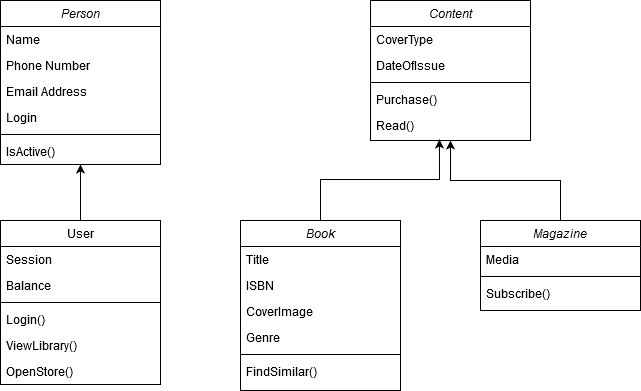

### C-2.25

Exercise R-2.12 uses the mul method to support multiplying a Vector
by a number, while Exercise R-2.14 uses the mul method to support
computing a dot product of two vectors. Give a single implementation of
Vector. mul that uses run-time type checking to support both syntaxes
u v and u k, where u and v designate vector instances and k represents
a number.

In [3]:
def __mul__(self, d):
    """Return product of Vector and some integer d or two Vector instances"""
    if isinstance(d, (int, float)):
        return [d * x for x in self]
    elif isinstance(d, (Vector)):
        result = Vector(len(self))
        for j in range(len(self)):
            result[j] = self[j] * d[j]
        return result

### C-2.26

The SequenceIterator class of Section 2.3.4 provides what is known as a
forward iterator. Implement a class named ReversedSequenceIterator that
serves as a reverse iterator for any Python sequence type. The first call to
next should return the last element of the sequence, the second call to next
should return the second-to-last element, and so forth.

In [16]:
class ReversedSequenceIterator:
    """An iterator for any of Python's sequence types."""

    def __init__(self, sequence):
        """Create an iterator for the given sequence."""
        self._seq = sequence          # keep a reference to the underlying data
        self._k = len(sequence)       # will decrease to n - 1 on first call to next

    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        self._k -= 1                  # advance to next index
        if self._k > -1:
            return(self._seq[self._k])  # return the data element
        else:
            raise StopIteration()       # there are no more elements

    def __iter__(self):
        """By convention, an iterator must return itself as an iterator."""
        return self
    

a = ReversedSequenceIterator([1, 2, 3])
print(a.__next__())
print(a.__next__())
print(a.__next__())

3
2
1


### C-2.27

In Section 2.3.5, we note that our version of the Range class has implicit support for iteration, due to its explicit support of both len
and getitem . The class also receives implicit support of the Boolean
test, “k in r” for Range r. This test is evaluated based on a forward iteration through the range, as evidenced by the relative quickness of the test
2 in Range(10000000) versus 9999999 in Range(10000000). Provide a
more efficient implementation of the contains method to determine
whether a particular value lies within a given range. The running time of
your method should be independent of the length of the range.

In [140]:
class Range:
    """A class that mimic's the built-in range class."""

    def __init__(self, start, stop=None, step=1):
        """Initialize a Range instance.
    
        Semantics is similar to built-in range class.
        """
        if step == 0:
            raise ValueError('step cannot be 0')

        if stop is None:  # special case of range(n)
            start, stop = 0, start  # should be treated as if range(0,n)

        # calculate the effective length once
        self._length = max(0, (stop - start + step - 1) // step)

        # need knowledge of start and step (but not stop) to support __getitem__
        self._start = start
        self._step = step

    def __len__(self):
        """Return number of entries in the range."""
        return self._length

    def __getitem__(self, k):
        """Return entry at index k (using standard interpretation if negative)."""
        if k < 0:
            k += len(self)  # attempt to convert negative index

        if not 0 <= k < self._length:
            raise IndexError('index out of range')

        return self._start + k * self._step
    
    def __contains__(self, k):
        n = ((k + self._step - self._start) / self._step)
        return k >= self._start and n < self._length and n % 1 == 0


a = Range(1, 1000000000, 2)
print(99999999 in a)

True


### C-2.28, 2.29, 2.30

<a id='another_cell'></a>

In [68]:
# %load files/credit_card.py
class CreditCard:
    """A consumer credit card."""

    def __init__(self, customer, bank, acnt, limit):
        """Create a new credit card instance.

        The initial balance is zero.

        customer  the name of the customer (e.g., 'John Bowman')
        bank      the name of the bank (e.g., 'California Savings')
        acnt      the acount identifier (e.g., '5391 0375 9387 5309')
        limit     credit limit (measured in dollars)
        """
        self._customer = customer
        self._bank = bank
        self._account = acnt
        self._limit = limit
        self._balance = 0

    def get_customer(self):
        """Return name of the customer."""
        return self._customer

    def get_bank(self):
        """Return the bank's name."""
        return self._bank

    def get_account(self):
        """Return the card identifying number (typically stored as a string)."""
        return self._account

    def get_limit(self):
        """Return current credit limit."""
        return self._limit

    def get_balance(self):
        """Return current balance."""
        return self._balance
    
    def _set_balance(self, amount, operator = '+'):
        if operator in {'*', '+', '-', '/'} and isinstance(amount, (int, float)):
            self._balance = eval(str(self._balance) + operator + str(amount))
            
        else:
            raise ValueError('Wrong parameter types!')

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed; False if charge was denied.
        """
        if price + self._balance > self._limit:  # if charge would exceed limit,
            return False  # cannot accept charge
        else:
            self._set_balance(price)
            return True

    def make_payment(self, amount):
        """Process customer payment that reduces balance."""
        self._set_balance(-amount)


if __name__ == '__main__':
    wallet = []
    wallet.append(CreditCard('John Bowman', 'California Savings',
                             '5391 0375 9387 5309', 2500))
    wallet.append(CreditCard('John Bowman', 'California Federal',
                             '3485 0399 3395 1954', 3500))
    wallet.append(CreditCard('John Bowman', 'California Finance',
                             '5391 0375 9387 5309', 5000))

    for val in range(1, 17):
        wallet[0].charge(val)
        wallet[1].charge(2 * val)
        wallet[2].charge(3 * val)

    for c in range(3):
        print('Customer =', wallet[c].get_customer())
        print('Bank =', wallet[c].get_bank())
        print('Account =', wallet[c].get_account())
        print('Limit =', wallet[c].get_limit())
        print('Balance =', wallet[c].get_balance())
        while wallet[c].get_balance() > 100:
            wallet[c].make_payment(100)
            print('New balance =', wallet[c].get_balance())
        print()


Customer = John Bowman
Bank = California Savings
Account = 5391 0375 9387 5309
Limit = 2500
Balance = 136
New balance = 36

Customer = John Bowman
Bank = California Federal
Account = 3485 0399 3395 1954
Limit = 3500
Balance = 272
New balance = 172
New balance = 72

Customer = John Bowman
Bank = California Finance
Account = 5391 0375 9387 5309
Limit = 5000
Balance = 408
New balance = 308
New balance = 208
New balance = 108
New balance = 8



In [74]:
# %load files/predatory_credit_card.py
class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""

    LATE_FEE = 100
    
    def __init__(self, customer, bank, acnt, limit, apr, charge_counter = 0, min_pay = 0.5):
        """Create a new predatory credit card instance.

        The initial balance is zero.

        customer  the name of the customer (e.g., 'John Bowman')
        bank      the name of the bank (e.g., 'California Savings')
        acnt      the acount identifier (e.g., '5391 0375 9387 5309')
        limit     credit limit (measured in dollars)
        apr       annual percentage rate (e.g., 0.0825 for 8.25% APR)
        """
        super().__init__(customer, bank, acnt, limit)  # call super constructor
        self._apr = apr
        self._charge_counter = charge_counter
        self._init_balance = self._balance
        self._min_pay = min_pay

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        success = super().charge(price)  # call inherited method
        if not success:
            self._set_balance(5)  # assess penalty
        else:
            self._charge_counter += 1
            if self._charge_counter > 10:
                self._set_balance(1)
        
        return success  # caller expects return value

    def process_month(self):
        """Assess monthly interest on outstanding balance."""
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1 / 12)
            self._set_balance(monthly_factor,'*')
            if (self._init_balance != 0) and (self._balance / self._init_balance > self._min_pay):
                self._set_balance(self.LATE_FEE)
            self._init_balance = self.get_balance()


### C-2.28

The `PredatoryCreditCard` class of Section 2.4.1 provides a `process_month`
method that models the completion of a monthly cycle. Modify the class
so that once a customer has made ten calls to charge in the current month,
each additional call to that function results in an additional _$1_ surcharge.

In [75]:
a = PredatoryCreditCard('John Bowman', 'California Savings',
                             '5391 0375 9387 5309', 2500, 0.0825)
for i in range(20):
    a.charge(1)
    print(a.get_balance()) # starts going +2 after 10 charges

1
2
3
4
5
6
7
8
9
10
12
14
16
18
20
22
24
26
28
30


### C-2.29

Modify the `PredatoryCreditCard` class from Section 2.4.1 so that a customer is assigned a minimum monthly payment, as a percentage of the
balance, and so that a late fee is assessed if the customer does not subsequently pay that minimum amount before the next monthly cycle.

In [77]:
a = PredatoryCreditCard('John Bowman', 'California Savings',
                             '5391 0375 9387 5309', 2500, 0.0825) 
a.charge(1000)
a.process_month() # first month; initial balance is 1000 now

print(a.get_balance())

a.make_payment(400) # now balance is 600

print(a.get_balance())

a.process_month() # second month; month end balance / initial balance > 50%, thus late fee is assessed ($100)

print(a.get_balance())

1006.627966804368
606.627966804368
710.6486768309487


### C-2.30

At the close of Section 2.4.1, we suggest a model in which the `CreditCard`
class supports a nonpublic method, `_set_balance(b)`, that could be used
by subclasses to affect a change to the balance, without directly accessing
the `balance` data member. Implement such a model, revising both the
`CreditCard` and `PredatoryCreditCard` classes accordingly.

[2.30 implementation](#another_cell)

### C-2.31, 2.32

In [2]:
# %load files/progressions.py

class Progression:
    """Iterator producing a generic progression.

    Default iterator produces the whole numbers 0, 1, 2, ...
    """

    def __init__(self, start=0):
        """Initialize current to the first value of the progression."""
        self._current = start

    def _advance(self):
        """Update self._current to a new value.

        This should be overridden by a subclass to customize progression.

        By convention, if current is set to None, this designates the
        end of a finite progression.
        """
        self._current += 1

    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:  # our convention to end a progression
            raise StopIteration()
        else:
            answer = self._current  # record current value to return
            self._advance()  # advance to prepare for next time
            return answer  # return the answer

    def __iter__(self):
        """By convention, an iterator must return itself as an iterator."""
        return self

    def print_progression(self, n):
        """Print next n values of the progression."""
        print(' '.join(str(next(self)) for j in range(n)))


class ArithmeticProgression(Progression):  # inherit from Progression
    """Iterator producing an arithmetic progression."""

    def __init__(self, increment=1, start=0):
        """Create a new arithmetic progression.

        increment  the fixed constant to add to each term (default 1)
        start      the first term of the progression (default 0)
        """
        super().__init__(start)  # initialize base class
        self._increment = increment

    def _advance(self):  # override inherited version
        """Update current value by adding the fixed increment."""
        self._current += self._increment


class GeometricProgression(Progression):  # inherit from Progression
    """Iterator producing a geometric progression."""

    def __init__(self, base=2, start=1):
        """Create a new geometric progression.

        base       the fixed constant multiplied to each term (default 2)
        start      the first term of the progression (default 1)
        """
        super().__init__(start)
        self._base = base

    def _advance(self):  # override inherited version
        """Update current value by multiplying it by the base value."""
        self._current *= self._base


class FibonacciProgression(Progression):
    """Iterator producing a generalized Fibonacci progression."""

    def __init__(self, first=0, second=1):
        """Create a new fibonacci progression.

        first      the first term of the progression (default 0)
        second     the second term of the progression (default 1)
        """
        super().__init__(first)  # start progression at first
        self._prev = second - first  # fictitious value preceding the first

    def _advance(self):
        """Update current value by taking sum of previous two."""
        self._prev, self._current = self._current, self._prev + self._current
        


### C-2.31

Write a Python class that extends the `Progression` class so that each value
in the progression is the absolute value of the difference between the previous two values. You should include a constructor that accepts a pair of
numbers as the first two values, using 2 and 200 as the defaults.

In [16]:
class AbsoluteDifferenceProgression(Progression):
    """Iterator producing a progression where each value 
    is the absolute value of the difference between the previous two values."""
    
    def __init__(self, first=2, second=200):
        """Create a new progression
        
        first      the first term of the progression (default 2)
        second     the second term of the progression (default 200)
        """
        super().__init__(first)  # start progression at first
        self._prev = second + first
        
    def _advance(self):
        """Update current value by taking an absolute difference between previous two"""
        self._prev, self._current = self._current, abs(self._prev - self._current)

        
print('Absolute Difference progression with start value 0 and 200')
AbsoluteDifferenceProgression().print_progression(10)

Absolute Difference progression with start value 0 and 200
2 200 198 2 196 194 2 192 190 2


### C-2.32

Write a Python class that extends the `Progression` class so that each value
in the progression is the square root of the previous value. (Note that
you can no longer represent each value with an integer.) Your constructor should accept an optional parameter specifying the start value, using
65,536 as a default.

In [5]:
class SquareRootProgression(Progression):
    """Iterator producing a progression where each value 
    is the square root of the previous value."""
    
    def __init__(self, first=65536.0):
        """Create a new progression
        
        first      the first term of the progression (default 65536)
        """
        super().__init__(first)  # start progression at first
        
    def _advance(self):
        """Update current value by taking an absolute difference between previous two"""
        self._current = sqrt(self._current)

        
print('Square root progression with start value 2**128')
SquareRootProgression(2.0**128).print_progression(10)

Square root progression with start value 2**128
3.402823669209385e+38 1.8446744073709552e+19 4294967296.0 65536.0 256.0 16.0 4.0 2.0 1.4142135623730951 1.189207115002721


## Projects

### P-2.33

Write a Python program that inputs a polynomial in standard algebraic
notation and outputs the first derivative of that polynomial.

In [5]:
def polynomial_derivative(p: str) -> str:
    """Output first derivative of a polynomial p in standard form (e.g. f(x) = x**2 + x + 1)"""
    terms = re.split('[+,-]',p)
    ops = [x for x in p if x in {'+','-'}]
    coefs = []
    for i in terms:
        if ('x' in i):
            coef = int(i[0:i.index('*')]) if 48<=ord(i[0])<=58 else 1
            degr = int(i[i.index('**')+2:]) if 48<=ord(i[-1])<=58 else 1
            if degr - 1 > 0:
                coefs.append((str(coef * degr)+'*x**'+str(degr - 1)).replace('**1',''))
            else:
                coefs.append(str(coef * degr))
    
    output = ''
    for i in range(len(terms) - 1):
        output += coefs[i] + ops[i]
        
    print(output[:-1])
    
    
polynomial_derivative('5*x**2+2*x-150')
polynomial_derivative('x**4+2*x**2+x-150')
polynomial_derivative('x**2+5*x-150')

10*x+2
4*x**3+4*x+1
2*x+5


### P-2.34

Write a Python program that inputs a document and then outputs a barchart plot of the frequencies of each alphabet character that appears in
that document.

In [20]:
def process_doc(doc:str):
    file = open(doc)
    alph = {chr(a):0 for a in range(97,124)}
    for line in file:
        for i in line.lower():
            if i in alph:
                alph[i] += 1
    
    for k, v in sorted(list((y, x) for x, y in alph.items() if y != 0), reverse=True):
        print(v, '[*]'*k)

        
process_doc('Files/test.txt')

t [*][*][*][*][*][*][*]
s [*][*][*][*][*][*]
e [*][*][*][*][*]
i [*][*][*][*]
o [*][*][*]
h [*][*][*]
w [*][*]
u [*][*]
r [*][*]
n [*][*]
y [*]
l [*]
k [*]
f [*]


### P-2.34

Write a set of Python classes that can simulate an Internet application in
which one party, Alice, is periodically creating a set of packets that she
wants to send to Bob. An Internet process is continually checking if Alice
has any packets to send, and if so, it delivers them to Bob’s computer, and
Bob is periodically checking if his computer has a packet from Alice, and,
if so, he reads and deletes it.

In [82]:
class Party:
    """Class represents a party in the Internet app
    """
    
    def __init__(self, name):
        """Initialize an instance with name and an empty set of packets
        """
        self._name = name
        self._packets = []
        
    def _set_packets(self, packets):
        """Protected method for providing a list of packets
        """
        self._packets = packets
        
    def _get_packets(self, sender = None, receiver = None):
        """Protected method for getting a list of packets for a party
        """
        if not sender:
            sender = self.get_name()
        return [x for x in self._packets if x._get_sender() == sender and x._get_receiver() == receiver]
    
    def get_name(self):
        """Protected method for getting an instance name
        """
        return self._name
    
    def generate_packets(self, n, receiver):
        """Method for generating a list of packets
        """
        
        packets = [Packet(self.get_name(), receiver, 'test packet #{num}'.format(num = x)) for x in range(n)]
        self._set_packets(packets)
        
    def read_packets(self, sender, receiver):
        """Read packet contains and remove it
        """
        packets = self._get_packets(sender, receiver)
        for i in range(len(packets)):
            print(packets.pop(0)._get_contents())
        self._set_packets(packets)


In [83]:
class Packet:
    """Class that represents a packet entity
    """
    
    def __init__(self, sender, receiver, content=''):
        """Initialize an instance with user name and an empty content
        """
        self._receiver = receiver
        self._sender = sender           
        self._content = content
    
    def _get_sender(self):
        """Get party_from field
        """
        return self._sender
    
    def _get_receiver(self):
        """Get party_to field
        """
        return self._receiver
    
    def _get_contents(self):
        """Get packet content field
        """
        return self._content
    
        

In [98]:
class InternetApp:
    """Class for processing internet operations
    """
    SESSION_STATUS = {'ACTIVE', 'INACTIVE'}
    
    def __init__(self, session_id, session_status):
        """Initializing InternetApp instance with session_id and session_status
        """
        self._session_id = session_id
        self._session_status = session_status
        
    def get_session_status(self):
        """Get session status
        """
        return self._session_status
        
    def set_session_status(self, status):
        """Set session status
        """
        if status not in InternetApp.SESSION_STATUS:
            raise TypeError('session must be ACTIVE or INACTIVE only')
        else:
            self._session_status = status
            
    def _check_session(self):
        if self._session_status == 'ACTIVE':
            return True
        else:
            print('No active session')
            return False
        
    def check_packets(self, party_a, party_b):
        """Check if an instance contains packets
        """
        if self._check_session():
            if isinstance(party_a, Party) and isinstance(party_b, Party):
                return True if party_a._get_packets(party_a.get_name(), party_b.get_name()) else False
            else:
                raise TypeError('party_a and party_b parameters must belong to a Party class')
        
    
    def receive_packets(self, party_a, party_b):
        """Receieve a list of packets
        """
        if self._check_session():
            if isinstance(party_a, Party) and isinstance(party_b, Party):
                party_a._set_packets(party_b._get_packets(party_b.get_name(), party_a.get_name()))
            else:
                raise TypeError('party_a and party_b parameters must belong to a Party class')
    

In [99]:
party_a = Party('Alice')
party_b = Party('Bob')

app = InternetApp(random.randint(1, 100), 'INACTIVE')
app.set_session_status('ACTIVE')
print('\n--SESSION START--\n')

while app.get_session_status() == 'ACTIVE':
    print('\n--Generating packets for {0}--\n'.format(party_a.get_name()))
    party_a.generate_packets(random.randint(1, 5), party_b.get_name())
    
    for i in party_a._get_packets(party_a.get_name(), party_b.get_name()):
            print('Packet contents {0}: text:{1}, sender:{2}, receiver: {3}'.
                  format(party_a.get_name(),i._get_contents(), i._get_sender(), i._get_receiver()))

    print('\n--Checking and delivering packets to {0}--\n'.format(party_b.get_name()))

    if app.check_packets(party_a, party_b):
        app.receive_packets(party_b, party_a)

    for i in party_b._get_packets(party_a.get_name(), party_b.get_name()):
        print('Packet contents {0}: text:{1}, sender:{2}, receiver: {3}'.
              format(party_b.get_name() ,i._get_contents(), i._get_sender(), i._get_receiver()))

    print('\n--Check {0} for packets before reading: {1}\n'.
          format(party_b.get_name(), bool(party_b._get_packets(party_a.get_name(), party_b.get_name()))))

    print('--Reading packets:\n')
    party_b.read_packets(party_a.get_name(), party_b.get_name())

    print('\n--Check {0} for packets after reading: {1}\n'.
          format(party_b.get_name(), bool(party_b._get_packets(party_a.get_name(), party_b.get_name()))))
            
    
    if random.randint(1, 10) == 2:
        print('\n--SESSION END--\n')
        app.set_session_status('INACTIVE')
    


--SESSION START--


--Generating packets for Alice--

Packet contents Alice: text:test packet #0, sender:Alice, receiver: Bob
Packet contents Alice: text:test packet #1, sender:Alice, receiver: Bob
Packet contents Alice: text:test packet #2, sender:Alice, receiver: Bob

--Checking and delivering packets to Bob--

Packet contents Bob: text:test packet #0, sender:Alice, receiver: Bob
Packet contents Bob: text:test packet #1, sender:Alice, receiver: Bob
Packet contents Bob: text:test packet #2, sender:Alice, receiver: Bob

--Check Bob for packets before reading: True

--Reading packets:

test packet #0
test packet #1
test packet #2

--Check Bob for packets after reading: False


--Generating packets for Alice--

Packet contents Alice: text:test packet #0, sender:Alice, receiver: Bob
Packet contents Alice: text:test packet #1, sender:Alice, receiver: Bob
Packet contents Alice: text:test packet #2, sender:Alice, receiver: Bob
Packet contents Alice: text:test packet #3, sender:Alice, receiv

### P-2.36 & 2.37

Write a Python program to simulate an ecosystem containing two types
of creatures, ___bears___ and ___fish___. The ecosystem consists of a river, which is
modeled as a relatively large list. Each element of the list should be a
Bear object, a Fish object, or None. In each time step, based on a random
process, each animal either attempts to move into an adjacent list location
or stay where it is. If two animals of the same type are about to collide in
the same cell, then they stay where they are, but they create a new instance
of that type of animal, which is placed in a random empty (i.e., previously
None) location in the list. If a bear and a fish collide, however, then the
fish dies (i.e., it disappears).

Write a simulator, as in the previous project, but add a Boolean gender
field and a floating-point strength field to each animal, using an Animal
class as a base class. If two animals of the same type try to collide, then
they only create a new instance of that type of animal if they are of different genders. Otherwise, if two animals of the same type and gender try to
collide, then only the one of larger strength survives.

In [53]:
from abc import ABCMeta, abstractmethod

class Animal(metaclass=ABCMeta):
    """Animal base class
    """
    
    def __init__(self, strength = random.random(), gender = random.choice(['True', 'False'])):
        """Initialize an animal object
        """
        self._strength = strength
        self._gender = gender
    
    def get_gender(self):
        return self._gender
    
    def get_strength(self):
        return self._strength
    
class Bear(Animal):
    """Bear subclass of Animal
    """
    
    def __init__(self, strength = None, gender = None):
        super().__init__(strength, gender)
    
class Fish(Animal):
    """Fish subclass of Anymal
    """
    
    def __init__(self, strength = None, gender = None):
        super().__init__(strength, gender)
        
        
class Ecosystem:
    """Class representing an ecosystem
    """
    
    def __init__(self, low, high):
        """Define a river list
        """
        self._river = self._generate_river(low, high)
    
    def _generate_river(self, low, high):
        """Generate a river with random number of objcets
        """
        return [random.choice([Bear(), Fish(), None]) for x in range(random.randint(low, high))]
    
    def get_river(self):
        """Getter method for river
        """
        return self._river
    
    def set_river(self, river):
        """Setter method for river
        """
        self._river = river
    
    def move(self):
        """Perform a move for every object in the river
        """
        river = self.get_river()
        empty = [x for x in range(len(river)) if river[x] is None]
        for i in range(len(river)):
            move_cell = random.choice([i - 1, i, i + 1])
            if (0 <= move_cell < len(river)) and isinstance(river[i], Animal):
                if empty:
                    next_cell = random.choice(empty)
                else:
                    next_cell = None
                animal_next, next_cell = self.collide(river[i], river[move_cell], next_cell)
                if next_cell != -1 and next_cell:
                    river[next_cell] = animal_next
                    empty.remove(i)
                elif animal_next and next_cell == -1:
                    river[move_cell], river[i] = animal_next, None
                    empty.append(i)
        self.set_river(river)
            
    
    def collide(self, animal_a, animal_b, new_cell):
        """Process object collision event
        """
        if not isinstance(animal_b, Animal):
            return (animal_a, -1)
        if type(animal_a) != type(animal_b):
            return (animal_a, -1) if isinstance(animal_a, Bear) else (animal_b, -1)
        if animal_a.get_gender() != animal_b.get_gender():
            return (Bear(), new_cell) if isinstance(animal_a, Bear) else (Fish(), new_cell)
        if animal_a.get_strength() == animal_b.get_strength():
            return (None, None)
        if animal_a.get_strength() > animal_b.get_strength():
            return (animal_a, -1)
        else:
            return (animal_b, -1)
        
    def __str__(self):
        return ','.join('Bear' if isinstance(x, Bear) else 
                            ('Fish' if isinstance(x, Fish) else '----') for x in self.get_river())
    

In [56]:
eco = Ecosystem(20, 25)

print(str(eco))

for i in range(10):
    eco.move()
    print('****step: {0}****'.format(i))
    print(str(eco))
    time.sleep(2)

Fish,Fish,Bear,----,Fish,Bear,----,Fish,Bear,----,Fish,----,Fish,Bear,Fish,----,----,Fish,Bear,Bear,Fish,Bear
****step: 0****
Fish,Fish,Bear,----,----,Bear,Fish,----,Bear,Fish,----,----,Bear,----,Fish,----,----,Bear,Bear,Fish,Bear,----
****step: 1****
Fish,----,Bear,----,Bear,Fish,----,----,Bear,----,Fish,----,Bear,----,----,Fish,----,Bear,----,Bear,Bear,----
****step: 2****
----,Bear,----,Bear,----,----,Fish,Bear,----,----,----,Bear,----,----,Fish,----,----,Bear,----,Bear,Bear,----
****step: 3****
----,Bear,----,Bear,----,Fish,Bear,----,----,----,Bear,----,----,----,----,Fish,----,----,Bear,Bear,Bear,----
****step: 4****
----,Bear,----,----,----,Bear,Bear,----,----,Bear,----,----,----,----,----,----,Fish,----,Bear,Bear,Bear,----
****step: 5****
----,Bear,----,----,----,Bear,Bear,----,----,Bear,----,----,----,----,----,----,Fish,Bear,----,Bear,Bear,----
****step: 6****
----,Bear,----,----,----,Bear,Bear,----,----,Bear,----,----,----,----,----,----,Fish,Bear,----,Bear,Bear,----
****step

### P-2.38

Write a Python program that simulates a system that supports the functions of an e-book reader. You should include methods for users of your
system to “buy” new books, view their list of purchased books, and read
their purchased books. Your system should use actual books, which have
expired copyrights and are available on the Internet, to populate your set
of available books for users of your system to “purchase” and read.

In [2]:
from abc import abstractmethod
from os import walk
import textwrap


class Content:
    """Superclass for types of content available
    """
    
    COVER = {'HARD', 'SOFT'}
    
    def __init__(self, cover, date_of_issue, content):
        """Initialize an instance of content
        """
        if cover not in Content.COVER:
            raise ValueError('Cover can be: {0}'.format(str(Content.COVER)))
        self._cover = cover
        self._date_of_issue = date_of_issue
        self._content = textwrap.wrap(content)
    
    @abstractmethod
    def read(self):
        pass
        
    

class Book(Content):
    """Class representing a book, a subclass of Content
    """
    
    def __init__(self, cover, date_of_issue, title, isbn, genre, content):
        """Initialize a book
        """
        super().__init__(cover, date_of_issue, content)
        self._title = title
        self._isbn = isbn
        self._genre = genre
    
    def read(self, page, lines):
        """Function that returns books contents line by line
        
        page             page number
        lines            lines per page
        """
        return (line for line in self._content[page * lines: page * lines + lines])

    
class Library:
    """Class representing a book store
    """
    
    def __init__(self, url):
        """Initialize a store with a url with content
        """
        self._url = url
        
    def browse_library(self):
        """Function that returns store contents
        """
        return next(walk(self._url))[2]
    
    def purchase(self, user, title):
        """Function that creates a book and stores it for user
        """
        with open(self._url + '//' + title, encoding='utf-8') as f:
            user.add_to_library(title, Book('HARD', None, None, None, None, f.read()))

class User:
    """Class representing a user
    """
    
    def __init__(self, name):
        """Initiate a user and his library
        """
        self._name = name
        self._library = {}
        
    def add_to_library(self, title, content):
        """Add new entry to user library
        """
        self._library[title] = content
        
    def view_library(self):
        """Return users library
        """
        return [x for x in self._library.keys()]
    
    def get_book(self, title):
        """Get a particular book from library
        """
        return self._library[title]

In [6]:
alice = User('Alice')

library = Library('Files/Books')

print('--List of available book titles:--')
for title in library.browse_library():
    print(title)
    
print('--User picks a book for purchase: MobyDick--')
library.purchase(alice, 'MobyDick.txt')

print('--User decideds to view its library:--')
for title in alice.view_library():
    print(title)
    
print('--User reads first 10th page of its book (with 50 lines each):--')
for line in alice.get_book('MobyDick.txt').read(10, 50):
    print(line)

--List of available book titles:--
BlackHistory.txt
HempHurds.txt
MobyDick.txt
--User picks a book for purchase: MobyDick--
--User decideds to view its library:--
MobyDick.txt
--User reads first 10 lines of its book:--
what not. And as for going as cook,—though I confess there is
considerable glory in that, a cook being a sort of officer on ship-
board—yet, somehow, I never fancied broiling fowls;—though once
broiled, judiciously buttered, and judgmatically salted and peppered,
there is no one who will speak more respectfully, not to say
reverentially, of a broiled fowl than I will. It is out of the
idolatrous dotings of the old Egyptians upon broiled ibis and roasted
river horse, that you see the mummies of those creatures in their huge
bake-houses the pyramids.  No, when I go to sea, I go as a simple
sailor, right before the mast, plumb down into the forecastle, aloft
there to the royal mast-head. True, they rather order me about some,
and make me jump from spar to spar, like a grass

### P-2.39

Develop an inheritance hierarchy based upon a Polygon class that has
abstract methods area() and perimeter(). Implement classes Triangle,
Quadrilateral, Pentagon, Hexagon, and Octagon that extend this base
class, with the obvious meanings for the area() and perimeter() methods.
Also implement classes, IsoscelesTriangle, EquilateralTriangle, Rectangle, and Square, that have the appropriate inheritance relationships. Finally, write a simple program that allows users to create polygons of the
various types and input their geometric dimensions, and the program then
outputs their area and perimeter. For extra effort, allow users to input
polygons by specifying their vertex coordinates and be able to test if two
such polygons are similar.

In [53]:
class Polygon():
    """Abstract superclass for various types of polygons
    """
    
    def __init__(self, sides = [], coords = []):
        """Initiate an instance with geometric dimensions
        """
        self._sides = sides
        self._coords = coords
    
    @abstractmethod
    def area(self):
        """Abstract method for area definition
        """
        pass
    
    def perimeter(self):
        """Method for perimeter definition
        """
        return sum(x for x in self._sides)
    
    def area_coords(self):
        """Get an area from given coordinates in the form list of tuples
        """
        this_coords = self._coords[:]
        this_coords.append(this_coords[0])
        return abs(sum(this_coords[x - 1][0] * this_coords[x][1] - \
                            this_coords[x][0] * this_coords[x - 1][1] for x in range(len(this_coords))) / 2)
    
    def is_similar(self, poly_b):
        """Determine if two polygons are similar
        """
        if not isinstance(poly_b, Polygon):
            print('both parameters need to be Polygon\'s!')
        if ((self.area() % poly_b.area() == 0) or \
        (poly_b.area() % self.area() == 0)) and \
        ((self.perimeter() % poly_b.perimeter() == 0) or \
        (poly_b.perimeter() % self.perimeter() == 0)):
            return True
        return False
            
        
        
class Triangle(Polygon):
    
    SIDES = 3
    
    def __init__(self, sides):
        if len(sides) != Triangle.SIDES:
            raise ValueError('expected {0} sides for a triangle, given {1}'.format(Triangle.SIDES, len(sides)))
        super().__init__(sides)
    
    def area(self):
        p = self.perimeter() / 2
        return (p * (p - self._sides[0]) * (p - self._sides[1]) * (p - self._sides[2])) ** 0.5
    

class Quadrilateral(Polygon):
    
    SIDES = 4
    
    def __init__(self, sides, diagonal = 0):
        if len(sides) != Quadrilateral.SIDES:
            raise ValueError('expected {0} sides for a quadrilateral, given {1}'.format(Quadrilateral.SIDES, len(sides)))
        super().__init__(sides)
        self._diagonal = diagonal
    
    def area(self):
        p = self.perimeter() / 2
        return (sum(self._sides[0] + self._sides[1] + self._diagonal) * \
                    (p - self._sides[0]) * (p - self._sides[1]) * (p - self._diagonal)) + \
            (sum(self._sides[2] + self._sides[3] + self._diagonal) * \
                 (p - self._sides[2]) * (p - self._sides[3]) * (p - self._diagonal))
    

class Pentagon(Polygon):
    
    SIDES = 5
    
    def __init__(self, sides, apothem):
        if len(sides) != Pentagon.SIDES:
            raise ValueError('expected {0} sides for a pentagon, given {1}'.format(Pentagon.SIDES, len(sides)))
        super().__init__(sides)
        self._apothem = apothem
    
    def area(self):
        return 2.5 * self._sides[0] * self._apothem
    
    
class Hexagon(Polygon):
    
    SIDES = 6
    
    def __init__(self, sides):
        if len(sides) != Hexagon.SIDES:
            raise ValueError('expected {0} sides for a hexagon, given {1}'.format(Hexagon.SIDES, len(sides)))
        super().__init__(sides)
    
    def area(self):
        return (3 * (3**0.5) * (self._sides[0]**2)) / 2
        

class Octagon(Polygon):
    
    SIDES = 8
    
    def __init__(self, sides):
        if len(sides) != Octagon.SIDES:
            raise ValueError('expected {0} sides for an octagon, given {1}'.format(Octagon.SIDES, len(sides)))
        super().__init__(sides)
    
    def area(self):
        return (3 * (3**0.5) * (self._sides[0]**2)) / 2
    

class IsoscelesTriangle(Triangle):
    
    def __init__(self, sides):
        super().__init__(sides)
        
    def area(self):
        return (self._sides[2] * (self._sides[0] ** 2 - (self._sides[2] / 2) ** 2) ** 0.5) / 2
    

class EquilateralTriangle(Triangle):
    
    def __init__(self, sides):
        super().__init__(sides)
        
    def area(self):
        return (3 ** 0.5 / 4 * self._sides[0] ** 2)
    

class Rectangle(Quadrilateral):
    
    def __init__(self, sides):
        super().__init__(sides)
        
    def area(self):
        return self._sides[0] * self._sides[1]
    

class Square(Quadrilateral):
    
    def __init__(self, sides):
        super().__init__(sides)
        
    def area(self):
        return self._sides[0] ** 2
    

In [60]:
# Need to implement a factory class
        
def kinda_factory(sides, apothem = 0, diagonal = 0):
    
    len_sides = len(sides)
    
    if len_sides == 3:
        if sum(sides) / sides[0] == 3.0:
            return EquilateralTriangle(sides)
        if len(set(sides)) == 2:
            return IsoscelesTriangle(sides)
    
    if len_sides == 4:
        if sum(sides) / sides[0] == 4.0:
            return Square(sides)
        
    if len_sides == 5:
        return Pentagon(sides, apothem)
    
    if len_sides == 6:
        return Hexagon(sides)
    
    if len_sides == 8:
        return Octagon(sides)

    
sides = [3] * 8
poly_a = kinda_factory(sides)
poly_b = kinda_factory(sides)
print('Area:{0}\nPerimeter:{1}\nType:{2}'.format(poly.area(),poly.perimeter(),type(poly)))

poly_c = Polygon(coords = [(4, 10), (9, 7), (11, 2), (2, 2)])
print('Area, given coordinates {0} :{1}'.format(poly_c._coords, poly_c.area_coords()))

print('Polygons {0}, {1} are similar:{2}'.format(poly_a.__nam, poly_b.__name__, poly_a.is_similar(poly_b)))

Area:23.382685902179844
Perimeter:24
Type:<class '__main__.Octagon'>
Area, given coordinates [(4, 10), (9, 7), (11, 2), (2, 2)] :45.5


AttributeError: 'Octagon' object has no attribute '__name__'